# Nonsolobaschet Stats | 2018

In [2]:
import fanta
import config

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scores txt files

### Gianluca | La mamma di Enrico

In [3]:
%%writefile gianluca.txt
gg pf ps gs c mdif
1 77.5 87.5 3 2 0
2 67 68.5 2 4 0
3 74 71.5 1 2 1
4 66 69.5 2 1 0
5 78.5 89.5 1 3 3
6 86.5 64.5 0 0 3
7 87 71 1 2 3
8 79 75.5 2 3 3
9 71.5 71 2 3 1
10 84 75 1 3 3
11 86 74.5 2 3 3
12 88 88.5 0 0 3
13 81.5 70 3 1 6
14 87 75.5 0 0 3
15 76 84 0 1 1
16 66.5 76 3 2 1
17 66.5 73 1 0 1
18 88.5 77 0 1 3
19 70.5 75 2 1 1
20 70.5 77.5 3 3 1
21 96 73 1 0 3
22
23 66.5 74 0 0 0
24 81 85 1 1 1
25 79.5 76.5 2 1 1
26 81.5 75.5 1 1 0
27 71.5 82 1 1 3
28 63 75.5 1 4 1

Overwriting gianluca.txt


### Fabio | Porti Chiusi Italiani

In [4]:
%%writefile fabio.txt
gg pf ps gs c mdif
1 75 69.5 1 2 0
2 79.5 84 1 2 0
3 74 77.5 1 3 1
4 58 73 0 5 0
5 89.5 78.5 0 4 0
6 73 75 1 3 0
7 80 82 1 0 1
8 75 77.5 1 1 1
9 82 70.5 0 2 0
10 75 84 0 2 1
11 64 68 3 1 1
12 79 70 1 2 0
13 71 76.5 2 3 0
14 65 98.5 1 2 1
15 84 76 0 2 3
16 69 73.5 0 2 1
17 79.5 70.5 0 1 1
18 79 69 0 4 1
19 80 79 0 2 3
20 77.5 70.5 0 1 0
21 68.5 72.5 1 1 0
22
23 61.5 66.5 4 1 1
24 71 79 1 0 1
25 76.5 79.5 1 1 0
26 67 69.5 2 1 0
27 66 85 1 5 0
28 71 74.5 1 1 0

Overwriting fabio.txt


### Enrico | Gianlucanonpressare

In [5]:
%%writefile enrico.txt
gg pf ps gs c mdif
1 64.5 83.5 2 2 0
2 67.5 85.5 2 3 1
3 71.5 74 2 6 0
4 73 58 0 2 0.
5 75 61.5 0 1 3
6 71 73.5 0 2 1
7 70.5 67.5 0 3 0
8 75.5 79 2 1 0
9 70.5 82 0 1 0
10 68 74 1 2 0
11 73 72 2 2 1
12 87.5 80 0 2 1
13 70 81.5 1 4 1
14 98.5 65 0 1 6
15 73 72 0 2 3
16 77.5 75.5 3 1 1
17 81 71 0 3 1
18 77 88.5 0 1 3
19 79 80 1 2 1
20 90 71.5 0 1 3
21 73.5 69 0 2 1
22
23 74 66.5 0 2 1
24 79 71 1 2 1
25 70.5 65 2 3 0
26 73.5 84 1 1 1
27 77.5 73.5 1 3 1
28 75.5 63 1 2 1

Overwriting enrico.txt


### Giulio | Dinamo Oegia

In [6]:
%%writefile giulio.txt
gg pf ps gs c mdif
1 87.5 77.5 2 0 3
2 85.5 67.5 1 1 0
3 77.5 74 1 1 0
4 68.5 69 2 1 1
5 76.5 79 0 3 0
6 64.5 86.5 0 3 0
7 67.5 70.5 0 2 1
8 77.5 75 1 0 0
9 59.5 63 1 4 0
10 84.5 78 1 1 1
11 74.5 86 1 2 0
12 80 87.5 1 2 1
13 76.5 71 1 2 3
14 73.5 77 1 3 1
15 65 67 1 2 0
16 76 66.5 0 2 1
17 71 81 0 3 1
18 69 79 1 2 1
19 70.5 64 0 3 0
20 82 82.5 2 0 1
21 73 96 0 1 1
22
23 66.5 61.5 2 1 1
24 89.5 67 1 3 1
25 66 62.5 0 1 0
26 75.5 81.5 3 0 1
27 73.5 77.5 0 2 1
28 74.5 71 3 1 0

Overwriting giulio.txt


### Luca | Nottingham Forrest Gump

In [7]:
%%writefile luca.txt
gg pf ps gs c mdif
1 69.5 75 3 2 0
2 68.5 67 0 0 1
3 75 69.5 2 2 1
4 69 68.5 1 0 1
5 61.5 75 2 2 1
6 75 73 3 3 1
7 71 87 1 1 1
8 69 80.5 2 2 1
9 63 59.5 1 3 1
10 74 68 1 3 1
11 68 64 3 1 1
12 88.5 88 1 1 1
13 72.5 74 2 3 1
14 77 73.5 2 2 1
15 72 73 0 3 1
16 73.5 69 0 1 1
17 73 66.5 0 0 1
18 72.5 70.5 0 1 0
19 64 70.5 1 2 1
20 71.5 90 0 3 1
21 72.5 68.5 0 1 1
22
23 91 80 0 0 3
24 67 89.5 1 0 1
25 65 70.5 1 2 0
26 69.5 67 0 1 1
27 82 71.5 0 1 1
28 71 67 3 0 1

Overwriting luca.txt


### Riccardo | Lagggente

In [8]:
%%writefile riccardo.txt
gg pf ps gs c mdif
1 83.5 64.5 0 4 0
2 84 79.5 3 2 0
3 69.5 75 1 0 0
4 69.5 66 0 2 0
5 79 76.5 0 0 0
6 73.5 71 0 2 0
7 82 80 1 3 3
8 80.5 69 0 2 3
9 71 71.5 2 1 1
10 78 84.5 1 1 1
11 72 73 2 3 0
12 70 79 0 2 3
13 74 72.5 0 0 0
14 75.5 87 1 2 0
15 67 65 0 2 0
16 75.5 77.5 1 1 3
17 70.5 79.5 3 2 1
18 70.5 72.5 2 1 1
19 75 70.5 1 4 1
20 82.5 82 2 0 0
21 69 73.5 0 3 0
22
23 80 91 2 1 0
24 85 81 3 1 3
25 62.5 66 2 2 0
26 84 73.5 0 1 3
27 85 66 1 4 3
28 67 71 3 3 1

Overwriting riccardo.txt


# Fill dataframe

In [9]:
df_final = fanta.configure_db()

### Global variables and stats #############################
games = max(df_final.index)   # Total number of matchdays, including uncompleted ones
games_completed = len(df_final.index.unique())   # Total number of matchdays completed
fp_mean = np.mean(df_final['fantapoints made'])
fp_med = np.median(df_final['fantapoints made'])
fp_std = np.std(df_final['fantapoints made'])
gm_mean = np.mean(df_final['GM'])
gm_med = np.median(df_final['GM'])
gm_std = np.std(df_final['GM'])

df_total = fanta.total_df(df_final)

In [10]:
### Data of the last matchday
print('\n### Data matchday number', games, ' ###')
df_last_day = df_final[df_final.index==games]
df_last_day.set_index('team', inplace=True)
display(df_last_day)

### Cumulative data
print('\n\n### Cumulative data after matchday', games, '(', games_completed,' completed )  ###')
param=['pos', 'points', 'distance', 'fantapoints made', 'rank', 'fantapoints against',
       'results', 'GM', 'GA', 'goals against gk',
      'cards', 'defense modifier', 'f_close_games', 'f_day_average', 'Luck Index'
      ] # Parameters to display
display(df_total[param].sort_values(by=['points', 'fantapoints made'], ascending=False))


### Data matchday number 28  ###


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
team,,,,,,,,,,,,
enrico,75.5,63.0,1.0,2.0,1.0,2,0,W,3,0.0,1.2,1.2
fabio,71.0,74.5,1.0,1.0,0.0,2,2,T,1,0.7,-0.8,-0.1
gianluca,63.0,75.5,1.0,4.0,1.0,0,2,L,0,0.0,0.0,0.0
giulio,74.5,71.0,3.0,1.0,0.0,2,2,T,1,-1.4,-0.8,-2.2
luca,71.0,67.0,3.0,0.0,1.0,2,1,W,3,0.4,1.2,1.6
riccardo,67.0,71.0,3.0,3.0,1.0,1,2,L,0,-0.2,-0.6,-0.8




### Cumulative data after matchday 28 ( 27  completed )  ###


,pos,points,distance,fantapoints made,rank,fantapoints against,results,GM,GA,goals against gk,cards,defense modifier,f_close_games,f_day_average,Luck Index
team,,,,,,,,,,,,,,,
enrico,1,45,0,2037.0,2,1987.5,"13W,6T,8L",64,57,22.0,57.0,32.0,7.000000e-01,4.0,4.7
luca,2,41,4,1946.0,6,1976.0,"11W,8T,8L",49,52,30.0,40.0,26.0,-5.000000e-01,13.2,12.7
giulio,3,39,6,2005.5,4,2018.5,"11W,6T,10L",60,66,26.0,46.0,20.0,1.700000e+00,-1.0,0.7
gianluca,4,37,8,2091.0,1,2056.0,"10W,7T,10L",81,68,36.0,43.0,49.0,-1.110223e-16,-11.0,-11.0
riccardo,5,32,13,2035.5,3,2018.0,"8W,8T,11L",62,64,31.0,49.0,27.0,-4.500000e+00,-5.6,-10.1
fabio,6,29,16,1990.5,5,2049.5,"8W,5T,14L",57,66,24.0,54.0,17.0,-2.000000e-01,-4.4,-4.6


# Luck Index

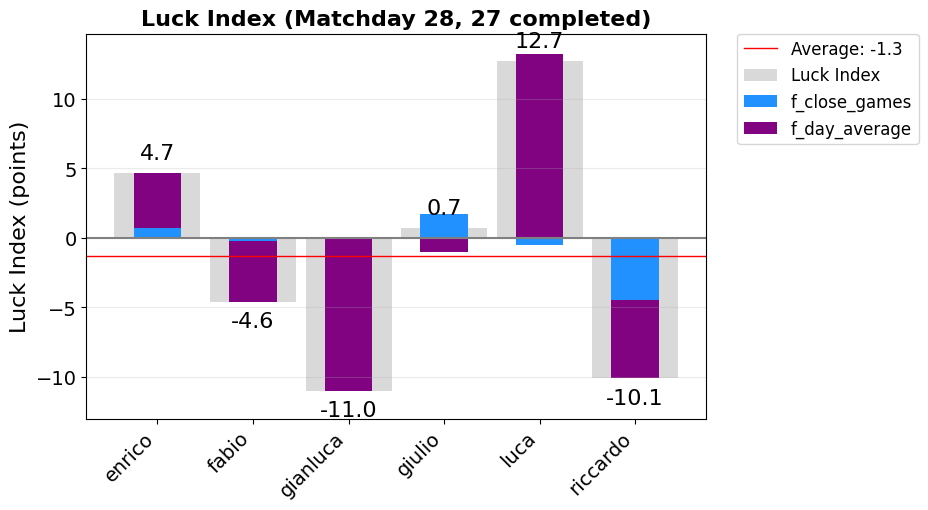

In [11]:
fanta.luck_index_plot(df_total, games, games_completed)

# Evolution Plots

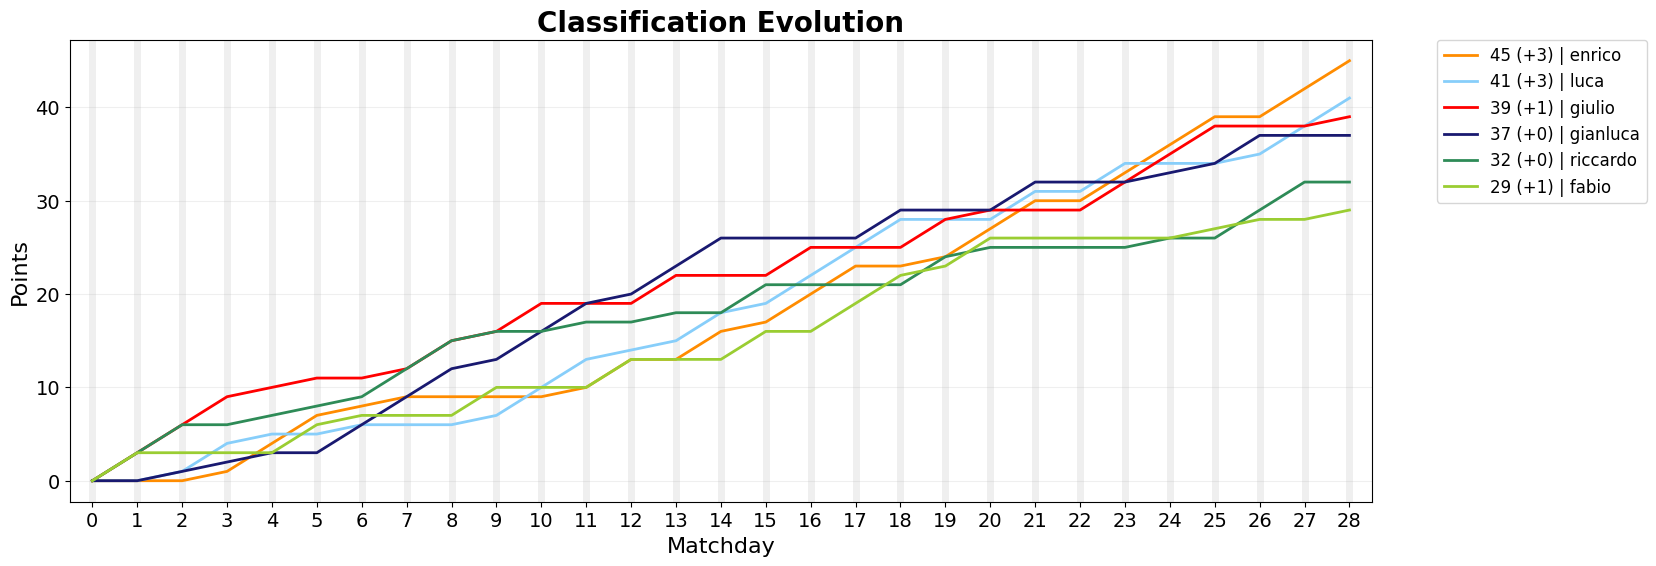

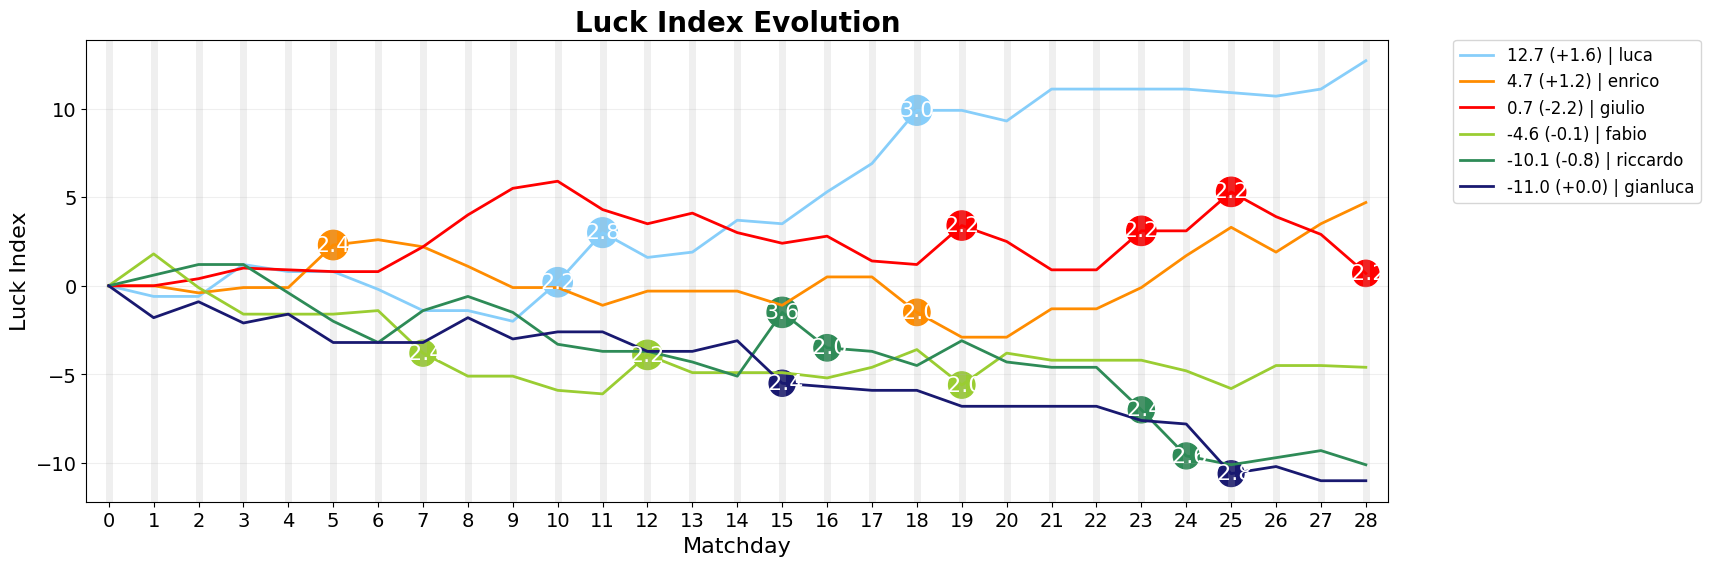

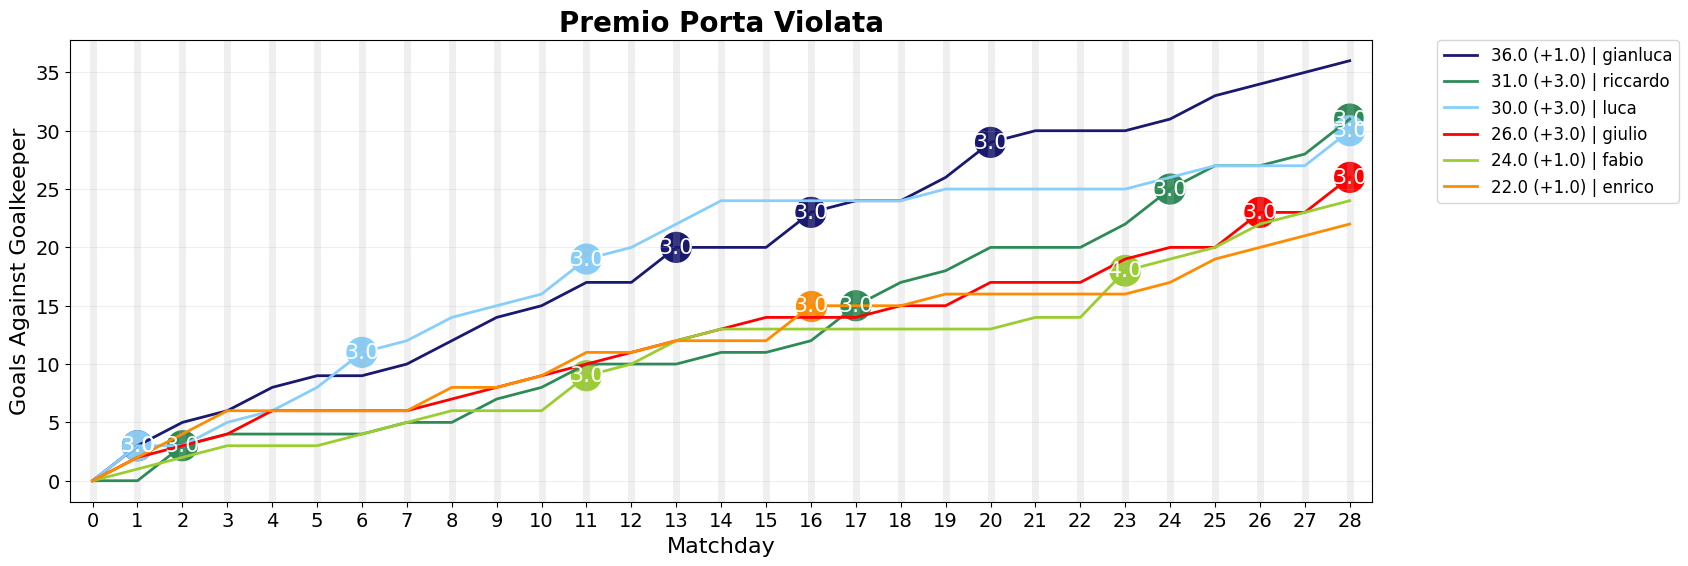

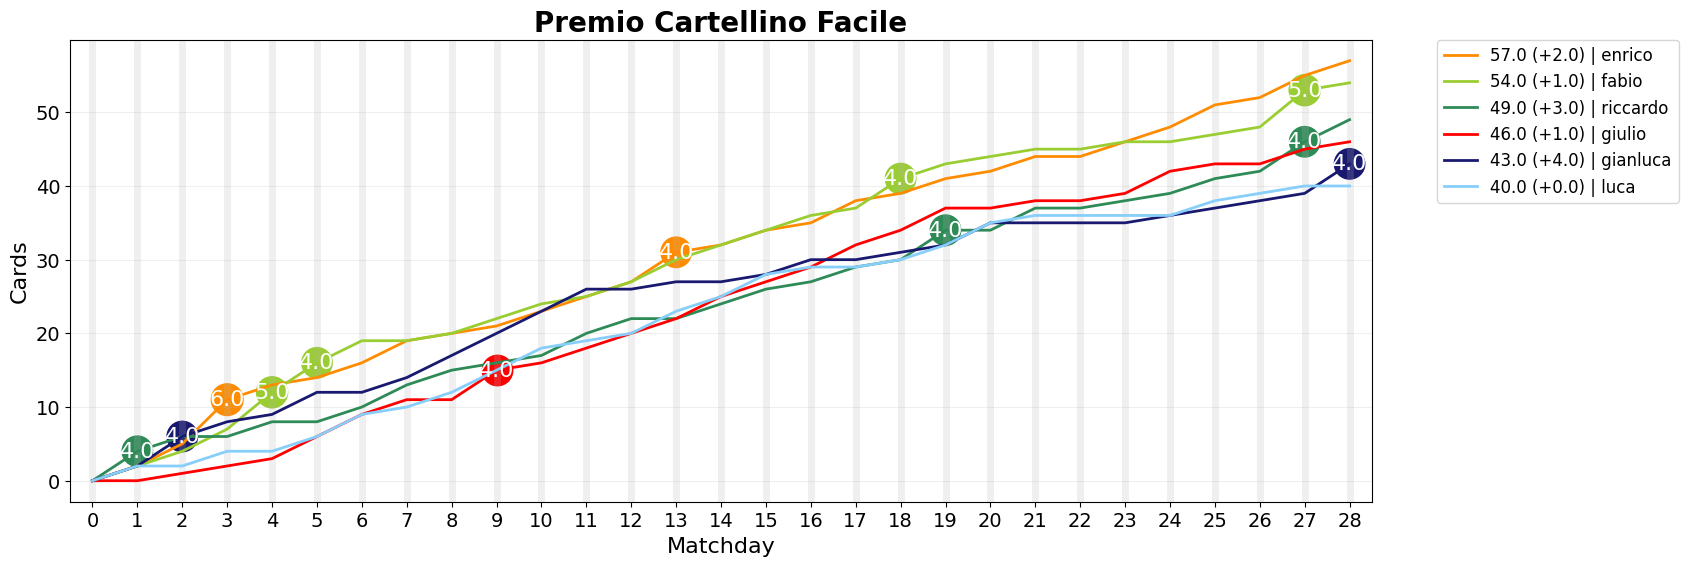

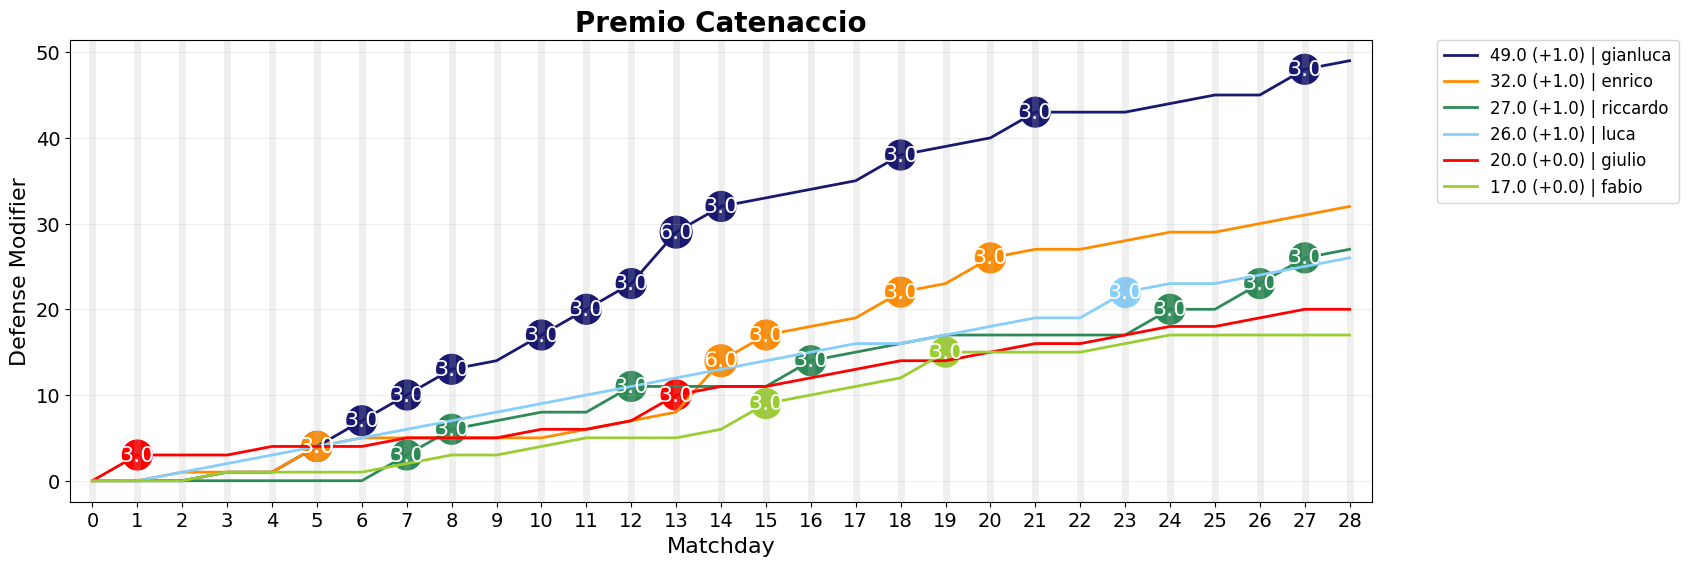

In [12]:
fanta.evo_plot(games, df_final, par='points', title='Classification Evolution', ylabel='Points', threshold=4)
fanta.evo_plot(games, df_final, par='Luck Index', title='Luck Index Evolution', ylabel='Luck Index', threshold=1.9)
fanta.evo_plot(games, df_final,
               par='goals against gk', title='Premio Porta Violata', ylabel='Goals Against Goalkeeper', threshold=2)
fanta.evo_plot(games, df_final,
               par='cards', title='Premio Cartellino Facile', ylabel='Cards', threshold=3)
fanta.evo_plot(games, df_final,
               par='defense modifier', title='Premio Catenaccio', ylabel='Defense Modifier', threshold=2) 

# Box plots

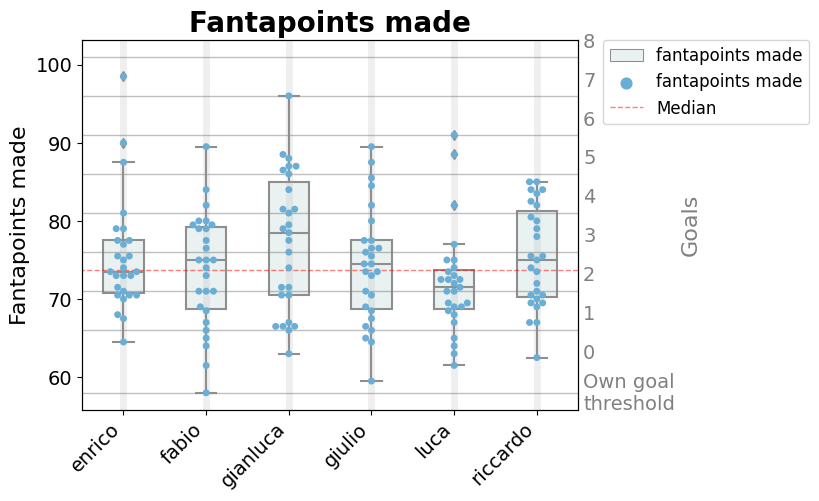

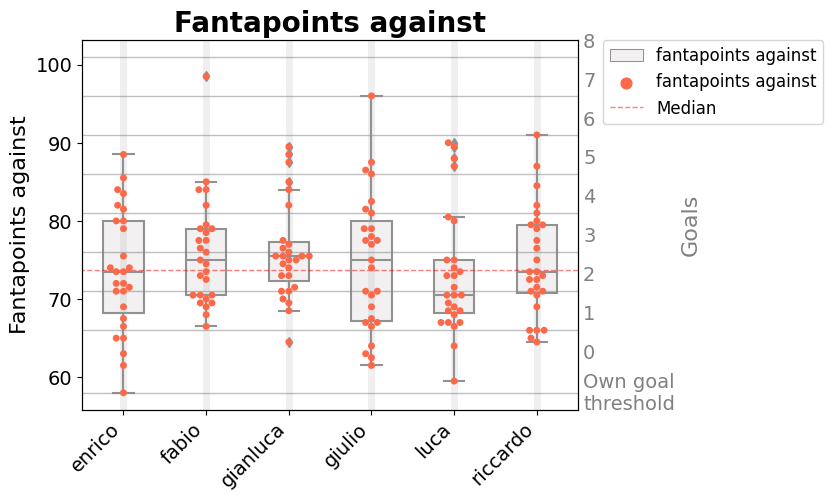

In [13]:
fanta.box_plot(df_final, fp_med,
               par='fantapoints made', label= 'Fantapoints made', title='Fantapoints made', col='cyan', pal='Blues')
fanta.box_plot(df_final, fp_med,
               par='fantapoints against', label= 'Fantapoints against', title='Fantapoints against', col='r', pal='Reds')

# Grahical display of results

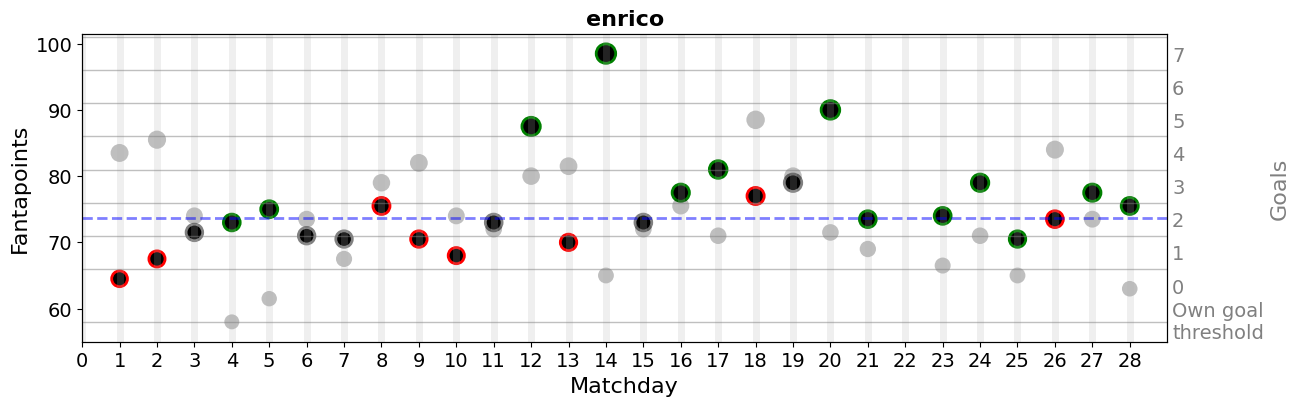

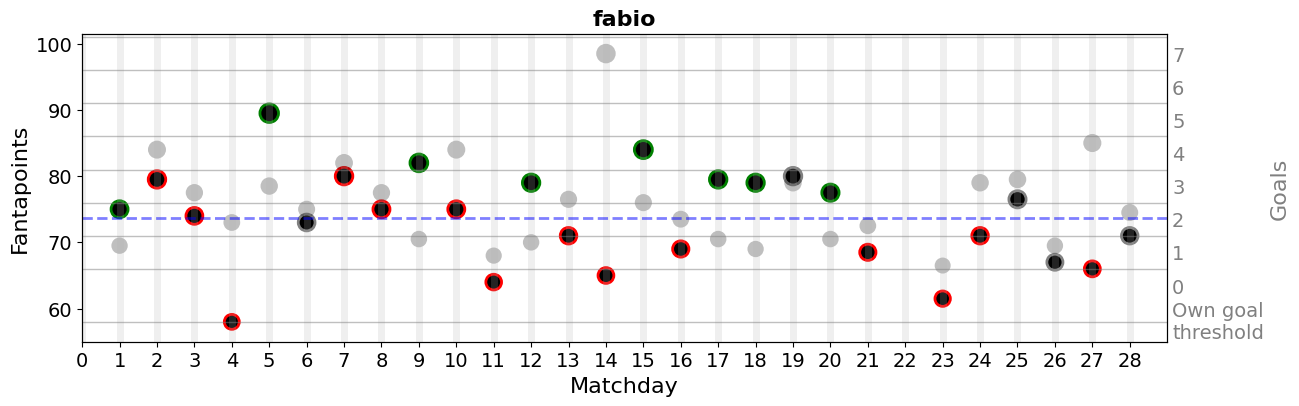

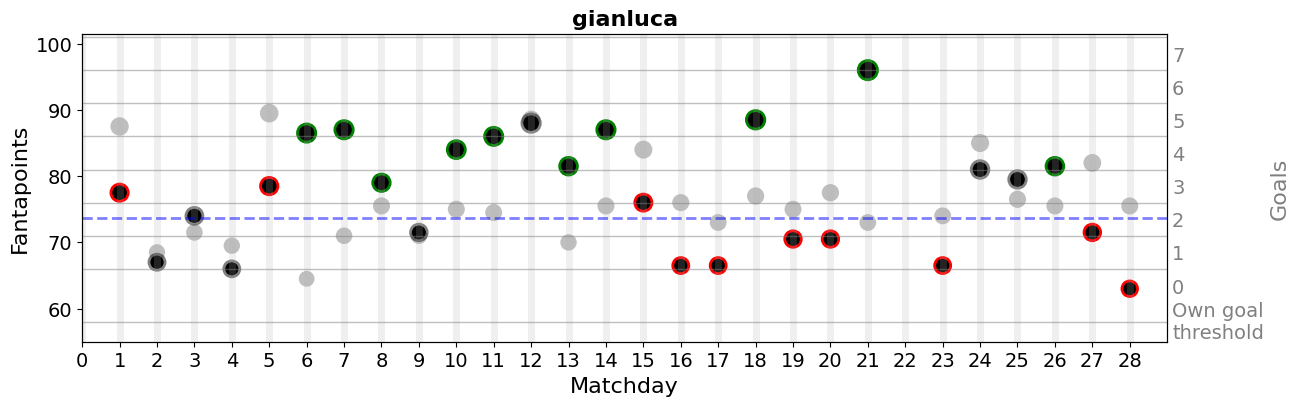

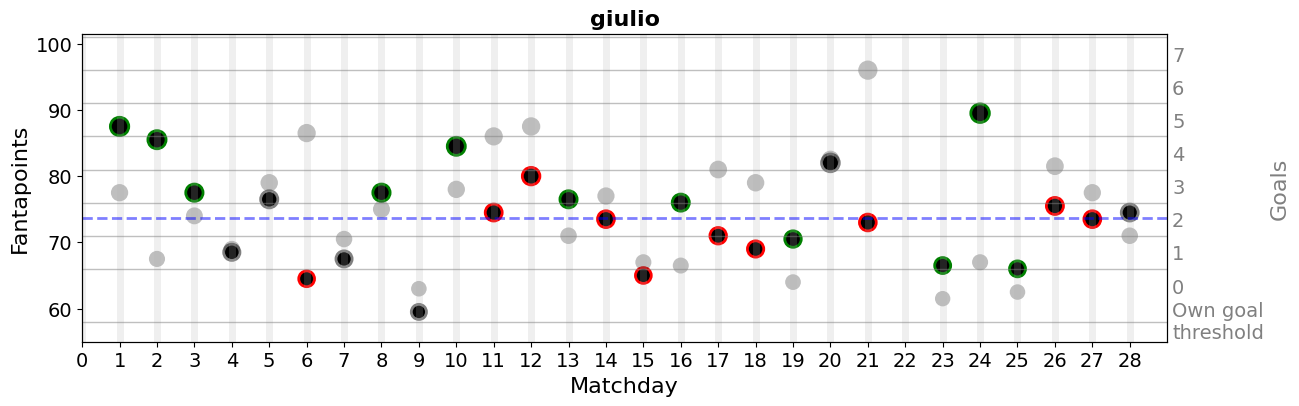

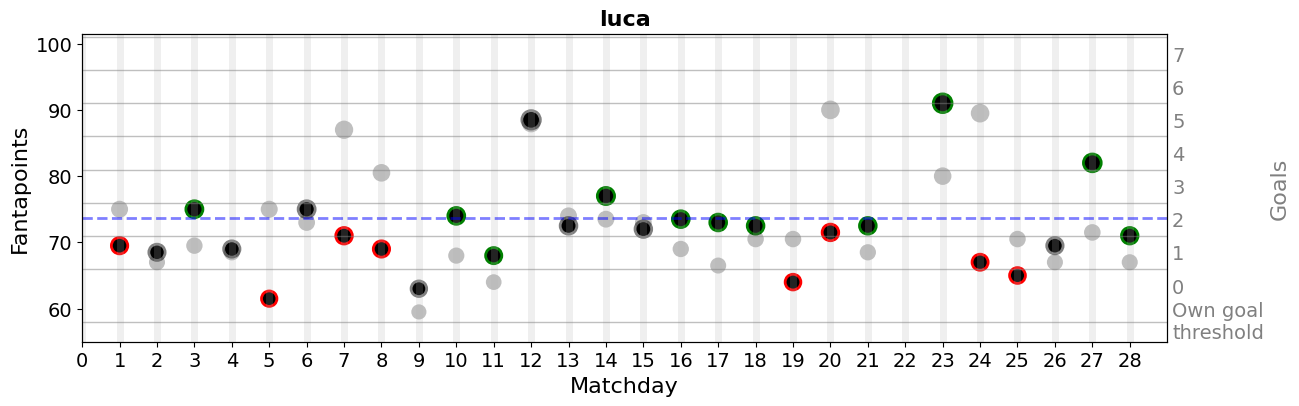

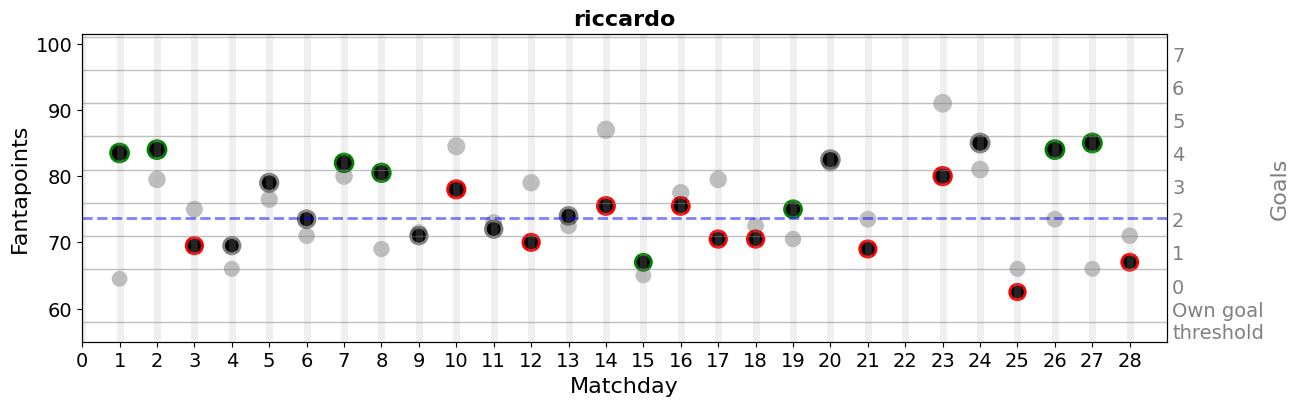

In [14]:
fanta.graphical_results(df_final, games, fp_med)

# Points and Goals vs Expected values

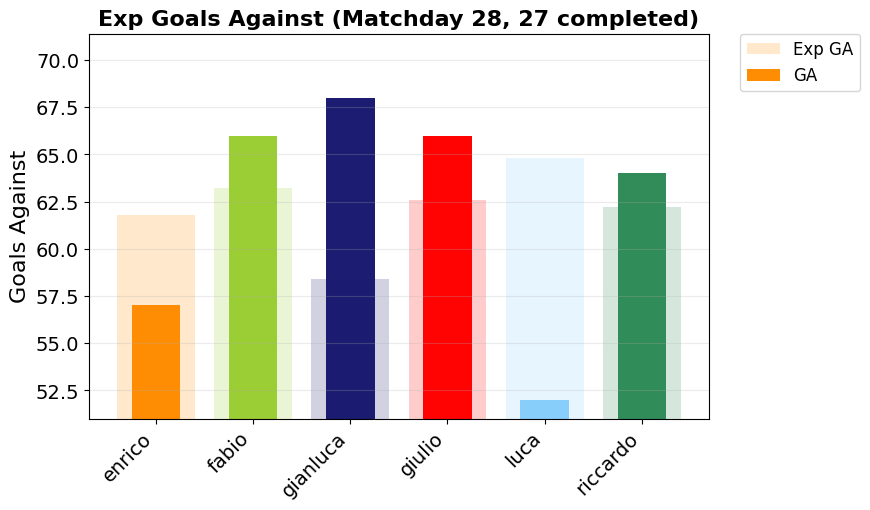

In [15]:
### Expected value of goals against, facing all other opponents ##############################
fanta.exp_goal_plot(df_total, games, games_completed)

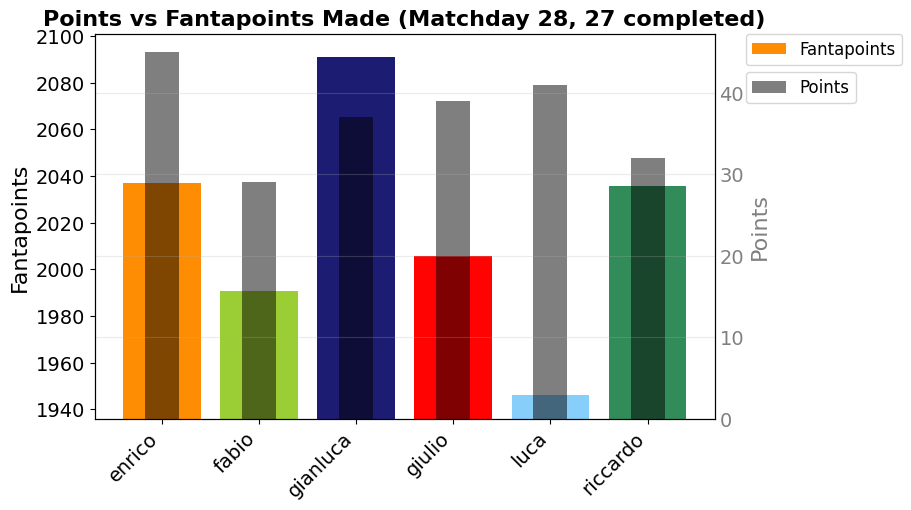

In [16]:
### Fantapoints made vs classification ###############
fanta.fantap_vs_class(df_total, games, games_completed)

# Stats & more

In [17]:
print('### CUMULATIVE DATA after matchday', games, '(', games_completed,' completed )  ###')
print('Fantapoints made:\n average =', fp_mean, '\n median =', fp_med, '\n standard deviation =', fp_std, 
      '\nGoals made:\n average =', gm_mean, '\n median =', gm_med, '\n standard deviation =', gm_std
     )

### Personal stats #####################################
personal_average = {}
for team, new_df in df_final.groupby(['team']):
    personal_average[team] = np.mean(new_df['fantapoints made'])
print('\n Personal Averages (Fantapoints):')
display(personal_average)

### CUMULATIVE DATA after matchday 28 ( 27  completed )  ###
Fantapoints made:
 average = 74.7253086419753 
 median = 73.75 
 standard deviation = 7.411421880277507 
Goals made:
 average = 2.302469135802469 
 median = 2.0 
 standard deviation = 1.4786109020512075

 Personal Averages (Fantapoints):


{'enrico': 75.44444444444444,
 'fabio': 73.72222222222223,
 'gianluca': 77.44444444444444,
 'giulio': 74.27777777777777,
 'luca': 72.07407407407408,
 'riccardo': 75.38888888888889}

In [18]:
### Display data divided by player

print('### PERSONAL DATA ###\n')

gms = np.arange(1, games+1)

for team, new_df in df_final.groupby(['team']):
    print('Team:', config.Teams[team][0], '(',team,')')
    display(new_df.drop(['team'], axis=1).reindex(gms, fill_value='--'))
    print('\n\n')

### PERSONAL DATA ###

Team: Gianlucanonpressare ( enrico )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,64.5,83.5,2,2,0,0,4,L,0,0,0,0
2,67.5,85.5,2,3,1,1,4,L,0,0,-0.4,-0.4
3,71.5,74,2,6,0,2,2,T,1,0.5,-0.2,0.3
4,73,58,0,2,0,2,0,W,3,0,0,0
5,75,61.5,0,1,3,2,0,W,3,0,2.4,2.4
6,71,73.5,0,2,1,2,2,T,1,0.5,-0.2,0.3
7,70.5,67.5,0,3,0,1,1,T,1,-1.2,0.8,-0.4
8,75.5,79,2,1,0,2,3,L,0,-0.3,-0.8,-1.1
9,70.5,82,0,1,0,1,4,L,0,0,-1.2,-1.2





Team: Porti Chiusi Italiani ( fabio )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,75,69.5,1,2,0,2,1,W,3,0,1.8,1.8
2,79.5,84,1,2,0,3,4,L,0,-0.1,-1.8,-1.9
3,74,77.5,1,3,1,2,3,L,0,-0.3,-1.2,-1.5
4,58,73,0,5,0,0,2,L,0,0,0,0
5,89.5,78.5,0,4,0,5,3,W,3,0,0,0
6,73,75,1,3,0,2,2,T,1,0.4,-0.2,0.2
7,80,82,1,0,1,3,4,L,0,-0.6,-1.8,-2.4
8,75,77.5,1,1,1,2,3,L,0,-0.5,-0.8,-1.3
9,82,70.5,0,2,0,4,1,W,3,0,0,0





Team: La mamma di Enrico ( gianluca )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,77.5,87.5,3,2,0,3,5,L,0,0,-1.8,-1.8
2,67,68.5,2,4,0,1,1,T,1,0.3,0.6,0.9
3,74,71.5,1,2,1,2,2,T,1,-1,-0.2,-1.2
4,66,69.5,2,1,0,1,1,T,1,0.7,-0.2,0.5
5,78.5,89.5,1,3,3,3,5,L,0,0,-1.6,-1.6
6,86.5,64.5,0,0,3,5,0,W,3,0,0,0
7,87,71,1,2,3,5,2,W,3,0,0,0
8,79,75.5,2,3,3,3,2,W,3,0.6,0.8,1.4
9,71.5,71,2,3,1,2,2,T,1,-0.2,-1,-1.2





Team: Dinamo Oegia ( giulio )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,87.5,77.5,2,0,3,5,3,W,3,0,0,0
2,85.5,67.5,1,1,0,4,1,W,3,0,0.4,0.4
3,77.5,74,1,1,0,3,2,W,3,0.6,0,0.6
4,68.5,69,2,1,1,1,1,T,1,0.1,-0.2,-0.1
5,76.5,79,0,3,0,3,3,T,1,0.5,-0.6,-0.1
6,64.5,86.5,0,3,0,0,5,L,0,0,0,0
7,67.5,70.5,0,2,1,1,1,T,1,0.6,0.8,1.4
8,77.5,75,1,0,0,3,2,W,3,1,0.8,1.8
9,59.5,63,1,4,0,0,0,T,1,0.7,0.8,1.5





Team: Nottingham Forrest Gump ( luca )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,69.5,75,3,2,0,1,2,L,0,0,-0.6,-0.6
2,68.5,67,0,0,1,1,1,T,1,-0.6,0.6,0
3,75,69.5,2,2,1,2,1,W,3,0,1.8,1.8
4,69,68.5,1,0,1,1,1,T,1,-0.2,-0.2,-0.4
5,61.5,75,2,2,1,0,2,L,0,0,0,0
6,75,73,3,3,1,2,2,T,1,-0.8,-0.2,-1
7,71,87,1,1,1,2,5,L,0,0,-1.2,-1.2
8,69,80.5,2,2,1,1,3,L,0,0,0,0
9,63,59.5,1,3,1,0,0,T,1,-1.4,0.8,-0.6





Team: Laggente ( riccardo )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,83.5,64.5,0,4,0,4,0,W,3,0,0.6,0.6
2,84,79.5,3,2,0,4,3,W,3,0.2,0.4,0.6
3,69.5,75,1,0,0,1,2,L,0,0,0,0
4,69.5,66,0,2,0,1,1,T,1,-1.4,-0.2,-1.6
5,79,76.5,0,0,0,3,3,T,1,-1,-0.6,-1.6
6,73.5,71,0,2,0,2,2,T,1,-1,-0.2,-1.2
7,82,80,1,3,3,4,3,W,3,1.2,0.6,1.8
8,80.5,69,0,2,3,3,1,W,3,0,0.8,0.8
9,71,71.5,2,1,1,2,2,T,1,0.1,-1,-0.9
